In [50]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA #PCA를 실행시키기 위한 패키지
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LDA를 실행 시키기 위한 패키지
%matplotlib inline

In [51]:
data = datasets.load_breast_cancer() #데이터 셋 로드
data.feature_names #데이터셋의 속성종류 확인

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [52]:
x = data.data[:,:2] #2번째 속성들만 저장
y = data.target #class 데이터 저장
target_names = data.target_names #악성과 양성 정보를 저장
print(x)
print(target_names)

[[17.99 10.38]
 [20.57 17.77]
 [19.69 21.25]
 ...
 [16.6  28.08]
 [20.6  29.33]
 [ 7.76 24.54]]
['malignant' 'benign']


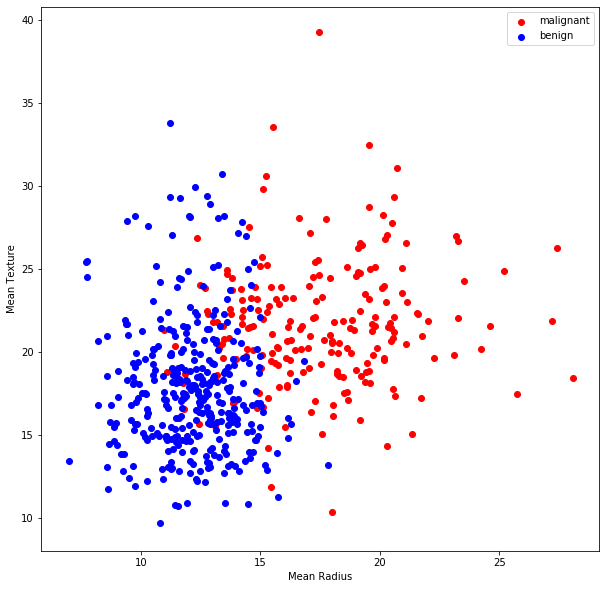

In [53]:
plt.figure(figsize=(10,10))
colors = ['red','blue']

for color, i, target_name in zip(colors, [0,1], target_names): #zip을 사용하면 각배열을 인덱스마다 묶어 리스트로 나타내줌. 
    plt.scatter(x[y==i, 0], x[y==i, 1], color=color, label=target_name) 
    #x인덱스0 즉 속성의 첫번째는 가로x축, x인덱스1 즉 속성의 두번째는 가로 y축, 각 클래스 i 에 대해 색상을 달리함
    
plt.legend()
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.show()

In [54]:
x = data.data
y = data.target
target_names = data.target_names #위와 동일한 방법이지만 x 를 전부 포함

In [55]:
pca = PCA(n_components=2) #주성분 2개를 추출하기 위함
x_p = pca.fit(x).transform(x) #훈련 후 차원 축소 진행
print('가장 큰 주성분 두개에 대한 분산 : %s' %str(pca.explained_variance_ratio_))

가장 큰 주성분 두개에 대한 분산 : [0.98204467 0.01617649]


[[1160.1425737  -293.91754364]
 [1269.12244319   15.63018184]
 [ 995.79388896   39.15674324]
 ...
 [ 314.50175618   47.55352518]
 [1124.85811531   34.12922497]
 [-771.52762188  -88.64310636]]


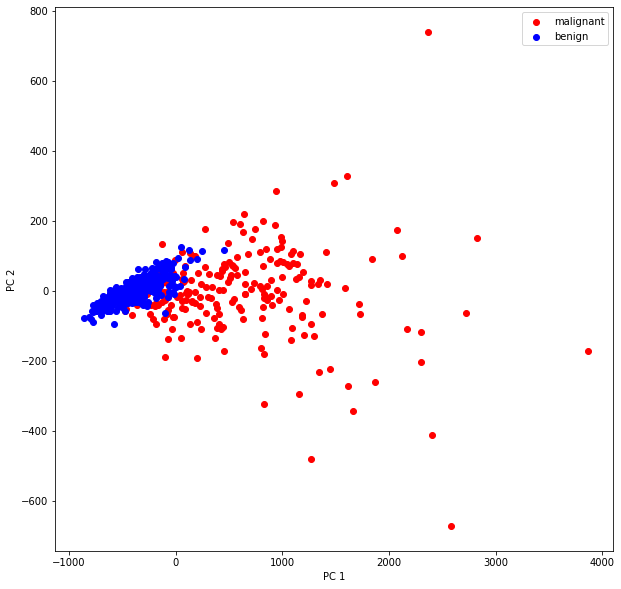

In [56]:
plt.figure(figsize=(10,10))
colors = ['red','blue']
print(x_p)
for color, i, target_name in zip(colors, [0,1], target_names): #zip을 사용하면 각배열을 인덱스마다 묶어 리스트로 나타내줌. 
    plt.scatter(x_p[y==i, 0], x_p[y==i, 1], color=color, label=target_name) 
    #x인덱스0 즉 속성의 첫번째는 가로x축, x인덱스1 즉 속성의 두번째는 가로 y축, 각 클래스 i 에 대해 색상을 달리함
    
plt.legend()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [57]:
x = data.data
y = data.target
target_names = data.target_names #위와 동일한 방법이지만 x 를 전부 포함

In [58]:
lda = LinearDiscriminantAnalysis(solver='eigen', n_components=2) #고유값을 사용해 클래스를 구분하는 벡터를 구하기 위해 eigen으로 설정
x_l = lda.fit(x,y).transform(x) #속성 데이터와 클래스 데이터y를 훈련시키고 차원축소 진행

C:\Users\SH\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(30, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\SH\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [59]:
plt.figure(figsize=(10,10))
colors = ['red','blue']
print(x_l)
for color, i, target_name in zip(colors, [0,1], target_names): #zip을 사용하면 각배열을 인덱스마다 묶어 리스트로 나타내줌. 
    plt.scatter(x_l[y==i, 0], x_l[y==i, 1], color=color, label=target_name) 
    #x인덱스0 즉 속성의 첫번째는 가로x축, x인덱스1 즉 속성의 두번째는 가로 y축, 각 클래스 i 에 대해 색상을 달리함
    
plt.legend()
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.show()

#결론 LDA의 모델이 현재 데이터에 대해 1차원으로 인식해버리기에 점을 찍을 수 없음.

[[15.17662264]
 [14.17003287]
 [15.60086656]
 [15.90252179]
 [14.13201565]
 [13.46118145]
 [14.20752208]
 [13.13031914]
 [13.45795303]
 [15.71631168]
 [12.71334348]
 [14.25088595]
 [13.17588251]
 [12.26772384]
 [13.09989116]
 [14.9184951 ]
 [13.96105555]
 [15.03024639]
 [15.29086588]
 [11.62331928]
 [ 9.86361705]
 [ 9.37613779]
 [13.64099554]
 [14.87771165]
 [15.72544823]
 [15.8491198 ]
 [14.59705081]
 [14.42790034]
 [14.9279243 ]
 [12.65051087]
 [15.26899317]
 [14.53099295]
 [15.49312583]
 [14.92776311]
 [14.53997587]
 [14.42450192]
 [12.9225337 ]
 [ 9.96861132]
 [11.35534078]
 [12.78811518]
 [11.61418371]
 [12.13747986]
 [15.95961397]
 [13.31193441]
 [13.25968811]
 [15.29835564]
 [ 8.56252773]
 [14.02884335]
 [10.55313243]
 [11.54467859]
 [10.2160067 ]
 [10.35590903]
 [10.36142472]
 [13.30892033]
 [12.75922203]
 [10.86306382]
 [14.98970671]
 [13.83166825]
 [10.21688968]
 [ 9.22987003]
 [ 9.47420472]
 [ 9.248977  ]
 [14.3022192 ]
 [ 9.49757323]
 [14.37135363]
 [13.28968118]
 [10.09469

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 720x720 with 0 Axes>